<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Gouped_bars_240812.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
# PARAMETERS
csv_file = '/content/sm_chl_24.csv' #"/content/lupin_PM_0602_ew.csv" #/content/lupina-params-1.csv

parameter = 'Phi_Po' # required column
#x_label = 'grass forage species' #'$\it{L.}$ $\it{albus}$ cultivars' # 'Chickpea ($\mathit{Cicer}$ $\it{arietinum}$) cultivars' # 'grass forage species' # 'L. albus cultivars' # 'Sorghum cultivars' # 'grass forage species' #

y_height = 1.6 # height of the graph
y_dist = 0.4 # distance between labels
title_main = 'DIo/RC'
y_label = '[mg /mL] AAE, GE'

In [108]:
import pandas as pd
import numpy as np

df = pd.read_csv(csv_file, delimiter=',', decimal='.') # delimiter '\t' or ';'

In [109]:
df

,species,month,method,mean,error
0,La ed,28/05,chl a,152.824800,12.174400
1,La ed,28/05,chl b,44.520000,1.384000
2,La ed,28/05,car,61.763494,14.489049
3,La sm,28/05,chl a,153.027200,2.799200
4,La sm,28/05,chl b,45.764000,2.516000
5,La sm,28/05,car,59.967358,7.434074
6,Hv ed,28/05,chl a,379.935600,10.804400
7,Hv ed,28/05,chl b,133.728000,2.144000
8,Hv ed,28/05,car,113.708455,1.694329
9,Hv sm,28/05,chl a,373.102600,24.141800


In [110]:
import itertools as it
month = pd.unique(df['month'].values).tolist()
method = pd.unique(df['method'].values).tolist()
combinations = np.array(np.meshgrid(month, method)).T.reshape(-1, 2)

<ipython-input-148-34d4a08f9d9d>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a3 = df[df['month'] == str(i)][df['method'] == str(j)]['mean'].values
<ipython-input-148-34d4a08f9d9d>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a3err = df[df['month'] == str(i)][df['method'] == str(j)]['error'].values
<ipython-input-148-34d4a08f9d9d>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a3 = df[df['month'] == str(i)][df['method'] == str(j)]['mean'].values
<ipython-input-148-34d4a08f9d9d>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a3err = df[df['month'] == str(i)][df['method'] == str(j)]['error'].values
<ipython-input-148-34d4a08f9d9d>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a3 = df[df['month'] == str(i)][df['method'] == str(j)]['mean'].values
<ipython-input-148-34d4a08f9d9d>:16: UserWarning: Boolean Series ke

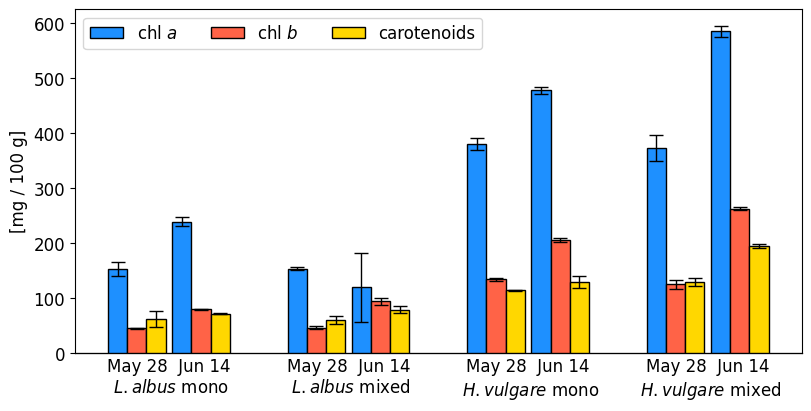

In [148]:
import matplotlib.pyplot as plt
# create data
x = np.arange(0, 10, 2.8)
fig, ax = plt.subplots(layout='constrained', figsize=(8, 4))

bar_kwargs = {'width':0.3,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5,'capthick':1,'lolims':False}
# plot data in grouped manner of bar type
xx = -0.8

color_method = { "chl a": "dodgerblue", "chl b": "tomato", "car": "gold"}

for i in month:
  for j in method:
    a3 = df[df['month'] == str(i)][df['method'] == str(j)]['mean'].values
    a3err = df[df['month'] == str(i)][df['method'] == str(j)]['error'].values
    #print (a3)
    ax.bar(x+xx, a3, yerr=a3err, color=color_method[j], **bar_kwargs,  error_kw=err_kwargs)

    xx = xx + 0.3
  xx = xx + 0.1
'''
#fig, ax = plt.subplots()
y1 = df[df['month'] == 'July'][df['method'] == 'PM']['mean'].values
y2 = df[df['month'] == 'July'][df['method'] == 'FRAP']['mean'].values
y1err = df[df['month'] == 'July'][df['method'] == 'PM']['error'].values
y2err = df[df['month'] == 'July'][df['method'] == 'FRAP']['error'].values

p1 = plt.bar(x-0.3, y1, color='blue',
             yerr=y1err, **bar_kwargs,  error_kw=err_kwargs)
p2 = plt.bar(x-0.3, y2, color='orange',
             bottom=y2err, yerr=y2err, **bar_kwargs,  error_kw=err_kwargs)
'''

label = pd.unique(df['species'].values)
plt.rc('font', size=12)
plt.xticks(x, label, fontsize=12)
''''''
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)

# Hide X and Y axes tick marks
ax.set_xticks([])

# label the classes:
sec = ax.secondary_xaxis(location=0)
sec.set_xticks(x, labels=['May 28  Jun 14', 'May 28  Jun 14',
                    'May 28  Jun 14', 'May 28  Jun 14'])
sec.tick_params('x', length=0)

# lines between the classes:
sec2 = ax.secondary_xaxis(location=0)
sec2.set_xticks(x, labels=['\n $\mathit{L. albus}$ mono', '\n $\mathit{L. albus}$ mixed',
                            '\n $\mathit{H. vulgare}$ mono', '\n $\mathit{H. vulgare}$ mixed'])
sec2.tick_params('x', length=0)

plt.ylabel('[mg / 100 g]')
#plt.legend(combinations.tolist(), loc='upper left')
ax.legend([r'chl ${\mathit{a}}$', 'chl ${\mathit{b}}$', 'carotenoids'], loc='upper left', ncols=3)
fig.show()
fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')

<ipython-input-112-d8b8875b612f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y1 = df[df['month'] == 'July'][df['method'] == 'PM']['mean'].values
<ipython-input-112-d8b8875b612f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y2 = df[df['month'] == 'July'][df['method'] == 'FRAP']['mean'].values
<ipython-input-112-d8b8875b612f>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y3 = df[df['month'] == 'October'][df['method'] == 'PM']['mean'].values
<ipython-input-112-d8b8875b612f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y4 = df[df['month'] == 'October'][df['method'] == 'FRAP']['mean'].values
<ipython-input-112-d8b8875b612f>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y1err = df[df['month'] == 'July'][df['method'] == 'PM']['error'].values
<ipython-input-112-d8b8875b612f>:9: UserWarning: Boolean Series key will be 

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (0,).

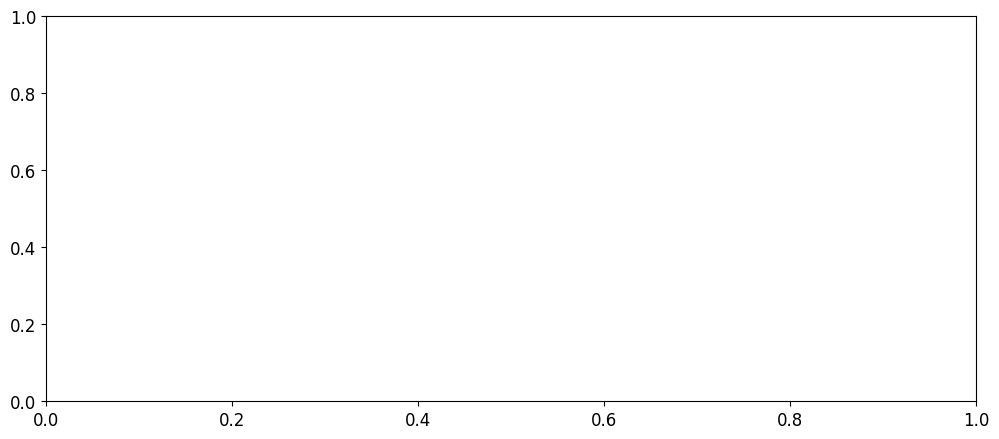

In [112]:
import matplotlib.pyplot as plt
# create data
x = np.arange(5)
y1 = df[df['month'] == 'July'][df['method'] == 'PM']['mean'].values
y2 = df[df['month'] == 'July'][df['method'] == 'FRAP']['mean'].values
y3 = df[df['month'] == 'October'][df['method'] == 'PM']['mean'].values
y4 = df[df['month'] == 'October'][df['method'] == 'FRAP']['mean'].values
y1err = df[df['month'] == 'July'][df['method'] == 'PM']['error'].values
y2err = df[df['month'] == 'July'][df['method'] == 'FRAP']['error'].values
y3err = df[df['month'] == 'October'][df['method'] == 'PM']['error'].values
y4err = df[df['month'] == 'October'][df['method'] == 'FRAP']['error'].values

# water extracts
y1w = [-2.69132653061225, -3.59360505565864, -1.7310702690167, -5.56847170686456, -8.37676832096475]
y1werr = [0.010870825602975, 0.268147031539887, 0.0362360853432275, 0.134073515769938, 0.3985969387755]

plt.figure(figsize=(12, 5))
bar_kwargs = {'width':0.2,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5,'capthick':1,'lolims':False}
# plot data in grouped manner of bar type
p1 = plt.bar(x-0.3, y1, color='pink', yerr=y1err, **bar_kwargs,  error_kw=err_kwargs)
p2 = plt.bar(x-0.1, y2, color='red', yerr=y2err, **bar_kwargs,  error_kw=err_kwargs)
p3 = plt.bar(x+0.1, y3, color='lightblue', yerr=y3err, **bar_kwargs,  error_kw=err_kwargs)
p4 = plt.bar(x+0.3, y4, color='blue', yerr=y4err, **bar_kwargs,  error_kw=err_kwargs)

p1w = plt.bar(x-0.3, y1w, bottom=y1, color='violet', yerr=y1werr, **bar_kwargs,  error_kw=err_kwargs)

label = pd.unique(df['species'].values)
plt.rc('font', size=12)
plt.xticks(x, label, fontsize=12)
import re
plt.ylabel('[mM / mg] AAE')
plt.legend((p1, p2, p3, p4, p1w), ncols=1, labels=['Jul, PM (etOH only)', 'Jul, FRAP (H$_2$O & etOH)',
                                          'Oct, PM (H$_2$O & etOH)', 'Oct, FRAP (H$_2$O & etOH)', 'Jul, PM (H$_2$O only)'])
# [re.sub(r'[\[\]\']', '', str(i)) for i in combinations.tolist()], loc='upper left') # automatic labeling
plt.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')

In [ ]:
'''
bar_kwargs = {'width':width,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5, 'capthick':1}
fig, ax = plt.subplots()

p1 = plt.bar(ind, menMeans1, color='blue',
             yerr=menStd1, **bar_kwargs,  error_kw=err_kwargs)
p2 = plt.bar(ind, menMeans2, color='orange',
             bottom=menMeans1, yerr=menStd2, **bar_kwargs,  error_kw=err_kwargs)

ax.set(title=title_main, ylabel=y_label, xlabel=x_label)
plt.xticks(ind, labels, color='k')
ax.set_xticklabels(labels, fontsize=12
                   , style='italic', rotation=90)
plt.ylim(ymax=y_height)
y_ticks = np.round(np.arange(0, y_height, y_dist), 1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=12)
plt.legend((p1[0], p2[0]), ('ethanol', 'water'))

fig.suptitle('')
plt.show()
'''

In [ ]:
import matplotlib.pyplot as plt
# create data
label = pd.unique(df['species'].values)
x = np.arange(len(label))
plt.figure(figsize=(12, len(label)))
bar_kwargs = {'width':0.2,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5,'capthick':1,'lolims':False}
# plot data in grouped manner of bar type
params = ['A_c', 'E']
y1, y1err, p = [], [], []

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
# plot data in grouped manner of bar type
for i in range(len(params)):
    stat_result = df.groupby(['groups'], as_index=False).agg({params[i]:['mean','std']})
    y1.append(stat_result[params[i]]['mean'].values)
    y1err.append(stat_result[params[i]]['std'].values)
    #p.append(plt.bar(x-xx, y1[i], yerr=y1err[i], **bar_kwargs,  error_kw=err_kwargs))

plt.rc('font', size=12)
plt.xticks(x, label, fontsize=12)
plt.ylabel('[mg / mL] AAE, GE')

p1 = ax1.bar(x-0.1, y1[0], yerr=y1err[0], color='red', **bar_kwargs,  error_kw=err_kwargs)
p2 = ax2.bar(x+0.1, y1[1], yerr=y1err[1], color='blue', **bar_kwargs,  error_kw=err_kwargs)
ax1.set_ylim(ymax=45)
ax2.set_ylim(ymax=7)
ax1.set_yticks(np.round(np.arange(0, 45, 10), 1))
ax2.set_yticks(np.round(np.arange(0, 7, 1), 1))
#ax1.set_xlabel('X data')
ax1.set_ylabel('A$_{n}$ [$\mu mol m^{-2} s^{-1}$]', color='black')
ax2.set_ylabel('E [$mmol m^{-2} s^{-1}$]', color='black')
fig.show()

fig.legend((p1,p2), ['$A_{n}$','E'], loc='upper left')
fig.savefig('anovatest.jpg',dpi=300,bbox_inches='tight')